In [67]:
import pandas as pd
%pip install xgboost
import xgboost as xb 
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
#Dando load no dado S&P 500 encontrado nesse link:
data = pd.read_csv('Data//all_stocks_5yr.csv')
data.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [69]:
data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [70]:
#Apenas vou selecionar os stocks da Amazon nesse modelo
AMZN = data.loc[data['Name']=='AMZN']
AMZN.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07


<Axes: >

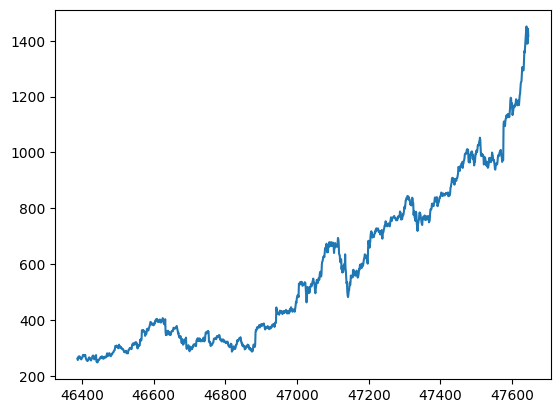

In [71]:
#Analisando a database da Amazon

AMZN['close'].plot()


In [72]:
#Separar os dados entre testing e training
training_data = AMZN.iloc[:int(.80*len(AMZN)), :]
testing_data = AMZN.iloc[int(.80*len(AMZN)):, :]

In [73]:
#Definir as variaveis 
_features = ['open', 'volume']
#Variavel target (O que queremos prever)
_target = 'close'

In [74]:
#Criar o modelo de ML e fazer a previsão
model = xb.XGBRegressor()
model.fit(training_data[_features], training_data[_target])

predictions = model.predict(testing_data[_features])
print("Predictions:")
print(predictions)


Predictions:
[814.453   813.3126  821.62555 832.9843  841.1068  826.69916 837.12555
 832.2963  832.6768  840.598   836.89685 833.0179  837.12555 839.02405
 838.2569  839.69403 840.761   840.598   839.54474 839.6363  840.7831
 840.0566  841.1884  839.69403 839.1406  841.30334 832.8794  839.6363
 838.5612  840.06213 840.761   839.87976 840.33966 833.1671  839.1089
 838.2569  828.0316  834.5887  825.6413  834.88104 828.4371  833.0179
 834.247   833.5119  839.34796 836.4105  836.02576 832.7571  836.2786
 836.37225 839.02484 829.34283 832.8794  840.598   824.5973  834.38153
 833.8697  833.14386 831.1526  839.02484 836.2786  835.12683 835.81256
 841.20447 839.62396 832.4677  837.8809  832.28436 822.427   828.0316
 828.0316  841.2083  839.02484 839.34796 839.6729  836.89685 835.81256
 824.5158  839.34796 832.2602  837.12555 833.4556  836.68054 838.2569
 833.1778  832.71954 836.401   828.0316  833.5009  833.711   825.6413
 839.54016 837.7949  839.54474 836.2786  834.4786  831.99927 835.424
 84

In [75]:
#
print("valores reais:")
print(testing_data[_target])

valores reais:
47394     819.71
47395     821.36
47396     827.46
47397     836.53
47398     836.39
          ...   
47641    1390.00
47642    1429.95
47643    1390.00
47644    1442.84
47645    1416.78
Name: close, Length: 252, dtype: float64


In [76]:
#Mostrar a precisão do modelo
accuracy = model.score(testing_data[_features], testing_data[_target])
print("Accuracy")
print(accuracy)

Accuracy
-1.7222378210028624


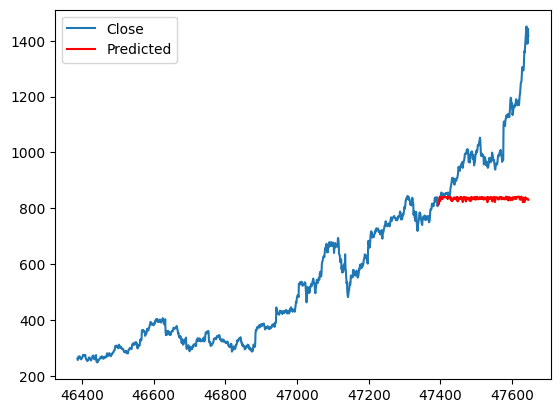

In [77]:
#Fazero o plot do close + previsoes
plt.plot(AMZN['close'], label='Close')
plt.plot(testing_data[_target].index, predictions, color='r', label='Predicted')
plt.legend()
plt.show()
    